In [10]:
from keras.datasets import mnist
from keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import plot_model, to_categorical

import matplotlib.pyplot as plt

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#数据变成TensorFow为Backend的形式
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
#把标签变成one-hot编码的形式
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [14]:
# 构建AlexNet-5网络
model = Sequential()
model.add(Conv2D(input_shape = (224,224,1), strides = 4, filters=96, kernel_size=(11,11), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=2))
model.add(Conv2D(filters=256, kernel_size=(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3,3), strides=2))
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=384, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 54, 54, 96)        11712     
_________________________________________________________________
batch_normalization_14 (Batc (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_15 (Batc (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 384)       885120    
__________

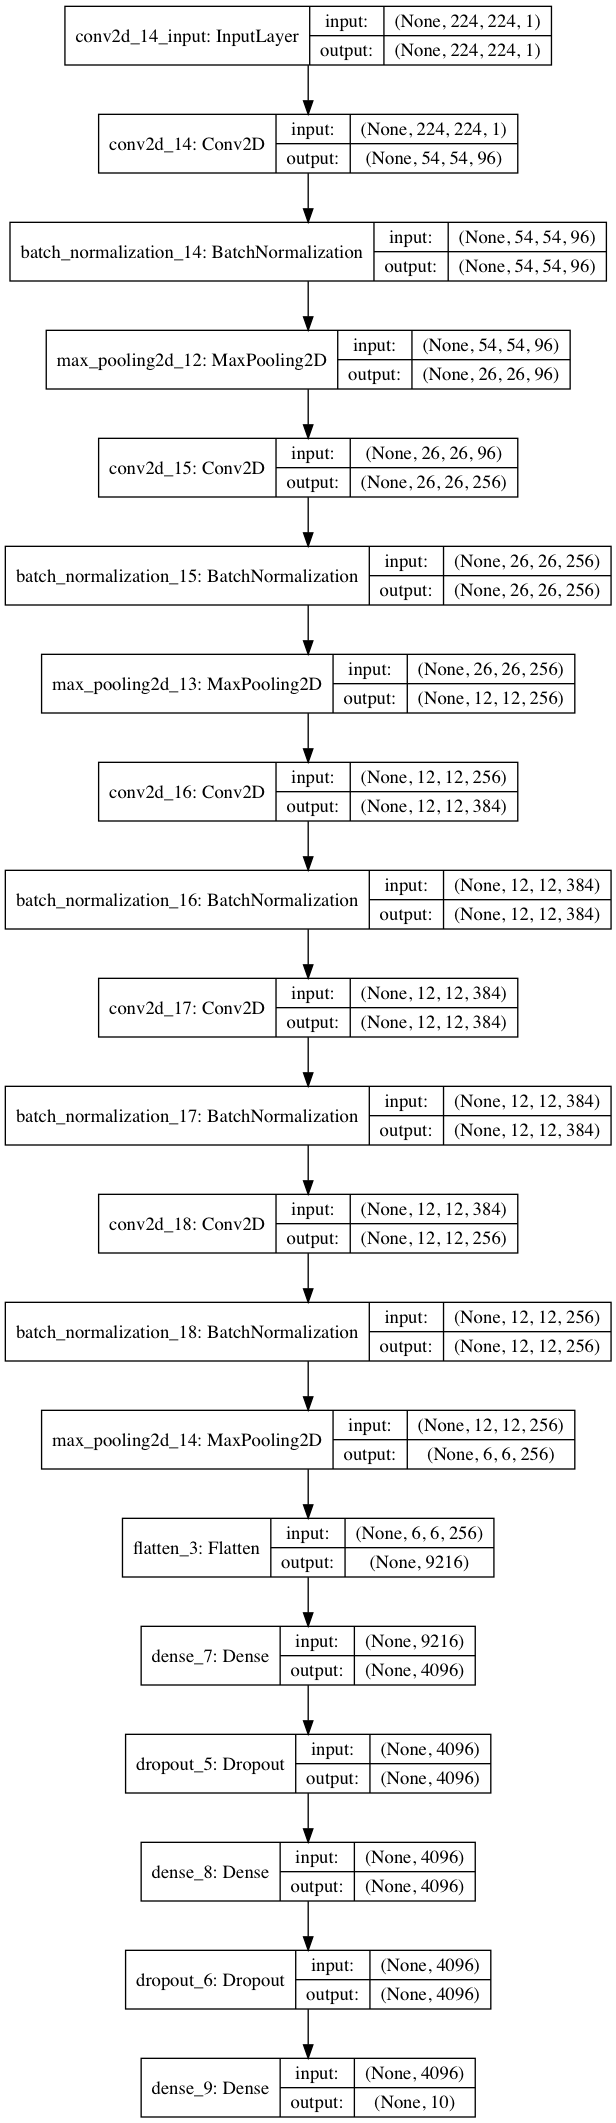

In [15]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="AlexNet.png", show_shapes=True)

Image('AlexNet.png')